<h1><center>PROYECTO DE ANÁLISIS EXPLORATORIO Y PROCESAMIENTO</center></h1>

## Autores : Daniel Enrique Barros Agamez & Kevin Acosta Lopez


## 1. Cargando Datos

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import ttest_ind

COLUMNAS = np.array(['Id','Fecha de Transaccion','No tarjeta cliente','Nombre comerciante','Categoria comerciante','Monto transaccion', 'Nombre',
           'Apellido','Genero','Direccion tarjeta','Ciudad','Estado','Zip tarjeta','Latitud','Longitud','Ciudad popular',
           'Trabajo','Fecha de nacimiento','Fecha unica','Hora transaccion','Latitud comerciante','Longitud comerciante', 'Fraude'])
data = pd.read_csv("fraudTest.csv", delimiter = ',' , names = COLUMNAS , header = 0)
del(COLUMNAS)
data.head(3)

,Id,Fecha de Transaccion,No tarjeta cliente,Nombre comerciante,Categoria comerciante,Monto transaccion,Nombre,Apellido,Genero,Direccion tarjeta,...,Latitud,Longitud,Ciudad popular,Trabajo,Fecha de nacimiento,Fecha unica,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


## 2. Procesamiento de los datos

### *2.1 y 2.2 Número de instancias y atributos:*

In [170]:
shape = data.shape
print(f"Número de instancias: {shape[0]}")
print(f"Número de atributos: {shape[1]}")

Número de instancias: 555719
Número de atributos: 23


### *2.3 El conjunto de datos está etiquetado con la variable de clase "is_fraud"*

In [171]:
data.dtypes

Id                         int64
Fecha de Transaccion      object
No tarjeta cliente         int64
Nombre comerciante        object
Categoria comerciante     object
Monto transaccion        float64
Nombre                    object
Apellido                  object
Genero                    object
Direccion tarjeta         object
Ciudad                    object
Estado                    object
Zip tarjeta                int64
Latitud                  float64
Longitud                 float64
Ciudad popular             int64
Trabajo                   object
Fecha de nacimiento       object
Fecha unica               object
Hora transaccion           int64
Latitud comerciante      float64
Longitud comerciante     float64
Fraude                     int64
dtype: object

### *2.4 Cantidad de atributos númerico y categoricos*

In [172]:
data['Fraude'] = data['Fraude'].astype('object')
categorico = data.select_dtypes(include = 'object').columns
numerico = data.select_dtypes(include = 'int64').columns
flotante = data.select_dtypes(include = 'float64').columns


print("Variables categoricas: ", len(categorico))
print("Variables númericas: ", len(numerico))
print("Variables numericas flotantes: ", len(flotante))

Variables categoricas:  13
Variables númericas:  5
Variables numericas flotantes:  5


### *2.5 Moda de atributos categoricos*

In [173]:
data = data.drop(columns=['Id', 'Fecha unica'])

In [174]:
data.select_dtypes(include='object').mode()

,Fecha de Transaccion,Nombre comerciante,Categoria comerciante,Nombre,Apellido,Genero,Direccion tarjeta,Ciudad,Estado,Trabajo,Fecha de nacimiento,Fraude
0,2020-10-05 19:37:49,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0
1,2020-12-13 17:53:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-17 20:36:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-19 16:02:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *2.6 Media, rango y desviación estandar de cada atributo numérico*

In [175]:
data.describe()

,No tarjeta cliente,Monto transaccion,Zip tarjeta,Latitud,Longitud,Ciudad popular,Hora transaccion,Latitud comerciante,Longitud comerciante
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026


In [176]:
#rango
data.select_dtypes(exclude='object').apply(lambda x: max(x)-min(x))

No tarjeta cliente      4.992346e+18
Monto transaccion       2.276711e+04
Zip tarjeta             9.866400e+04
Latitud                 4.566280e+01
Longitud                9.772200e+01
Ciudad popular          2.906677e+06
Hora transaccion        1.671751e+07
Latitud comerciante     4.765187e+01
Longitud comerciante    9.971955e+01
dtype: float64

### *2.7 Distribción de las clases*

        Fraude
Fraude        
0       553574
1         2145


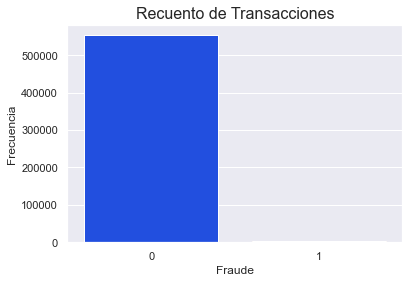

In [181]:
sb.countplot(x="Fraude", data=data, palette='bright')
plt.xlabel("Fraude")
plt.ylabel("Frecuencia")
plt.title("Recuento de Transacciones", fontsize=16)
print(data.groupby('Fraude').agg({'Fraude': 'count'}))
plt.show()

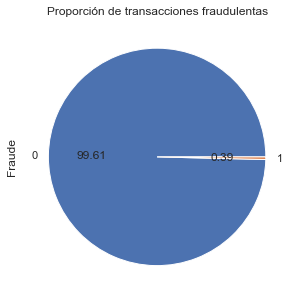

In [36]:
plot = data['Fraude'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(5, 5),
                                       title='Proporción de transacciones fraudulentas')
plt.show()

Media Duration :  69.39281023323066


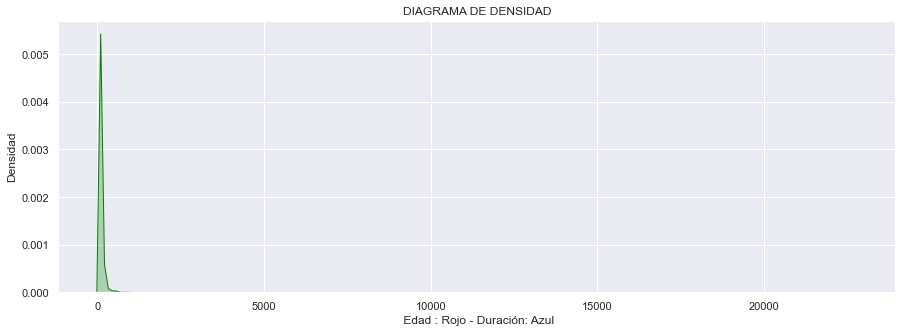

In [185]:
plt.figure(figsize=(15, 5))
media1 = data['Monto transaccion'].mean()
sb.kdeplot(x = data['Monto transaccion'].values, shade = True, color = 'green')
plt.ylabel("Densidad")
plt.xlabel(" Edad : Rojo - Duración: Azul")
plt.title("DIAGRAMA DE DENSIDAD")
print(f"Media Duration :  {media1}")


Text(0.5, 1.0, 'Distribución de Monto de Transacción \nExitosas')

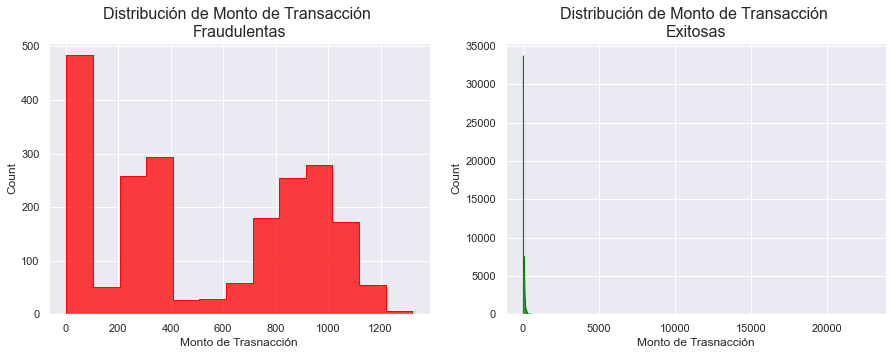

In [189]:
monto_Fra = data['Monto transaccion'].loc[data['Fraude'] == 1].values #Fraudulentas
monto_Exi = data['Monto transaccion'].loc[data['Fraude'] == 0].values #Exitosas
#Figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1 = sb.histplot(monto_Fra, ax = ax1, element = "step", color = 'red')
ax2 = sb.histplot(monto_Exi, ax = ax2, element="step", color = 'green')
#Etiquetas
ax1.set_xlabel('Monto de Trasnacción')
ax1.set_title('Distribución de Monto de Transacción \nFraudulentas', fontsize=16)
ax2.set_xlabel('Monto de Trasnacción')
ax2.set_title('Distribución de Monto de Transacción \nExitosas', fontsize=16)

### *2.8 Detección de datos atipicos*

In [29]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

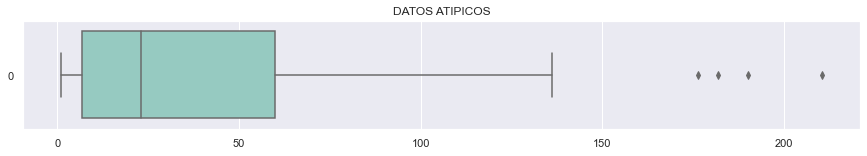

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: Monto transaccion, dtype: float64


In [198]:
plt.figure(figsize=(15, 2))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(data = data['Monto transaccion'].head(100), orient="h", palette="Set3")
plt.show()
print(data['Monto transaccion'].describe())

## 3. Relacionando Atributos

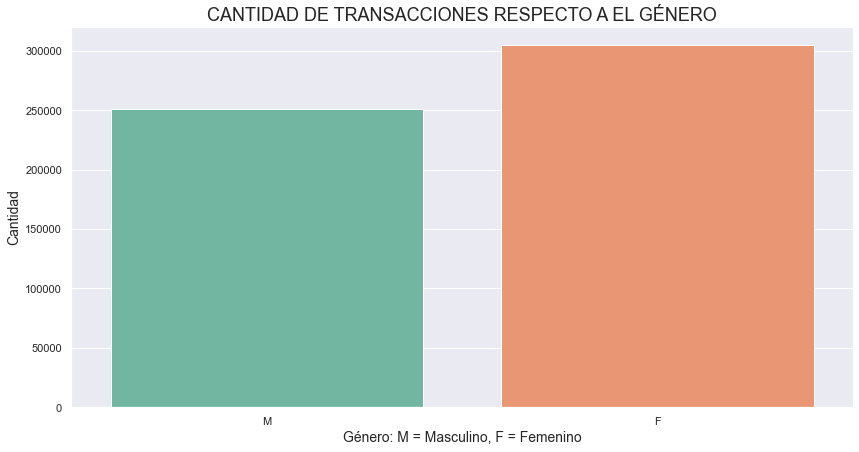

In [100]:
#Relación cantidad de transacciones y género
plt.figure(figsize=(14,7))
ax = sb.countplot(x = data['Genero'], data = data, palette="Set2")
ax.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_title("CANTIDAD DE TRANSACCIONES RESPECTO A EL GÉNERO", fontsize=18)
plt.show()

In [54]:
data.groupby('Genero')['Genero'].count().sort_values(ascending = False)

Genero
F    304886
M    250833
Name: Genero, dtype: int64

In [126]:
#Relación cantidad de transacciones exitosas y fraudulentas con respecto al género
genero_Fra = data[data.Fraude == 1] # fraudulentas
genero_Exi = data[data.Fraude == 0] # exitosas

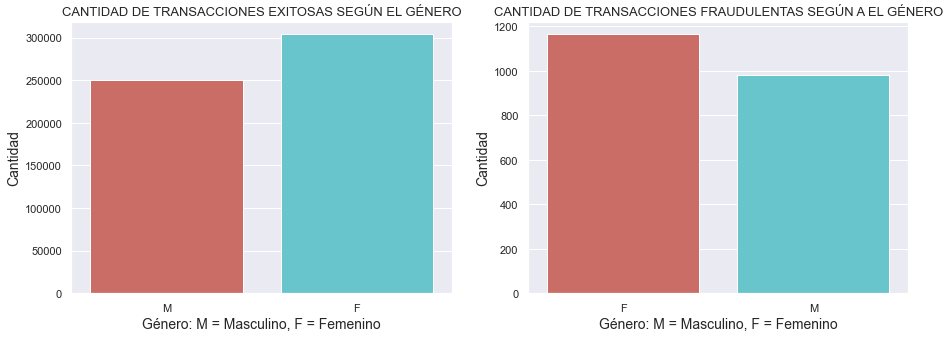

In [138]:
#Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
#Gráfica
ax1 = sb.countplot(x = 'Genero', data = genero_Exi, ax = ax1, palette = 'hls')
ax2 = sb.countplot(x = 'Genero', data = genero_Fra, ax = ax2, palette = 'hls')
#Etiquetas
ax1.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax1.set_ylabel("Cantidad", fontsize=14)
ax1.set_title("CANTIDAD DE TRANSACCIONES EXITOSAS SEGÚN EL GÉNERO", fontsize=13)
ax2.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax2.set_ylabel("Cantidad", fontsize=14)
ax2.set_title("CANTIDAD DE TRANSACCIONES FRAUDULENTAS SEGÚN A EL GÉNERO", fontsize=13)
plt.show()

In [94]:
#data['Fecha de Transaccion'] = pd.to_datetime(data['Fecha de Transaccion'])
#ax = sb.lineplot(x='Fecha de Transaccion', data = data)
estados = data.groupby('Estado')['Estado'].count().sort_values(ascending = False).head(10)

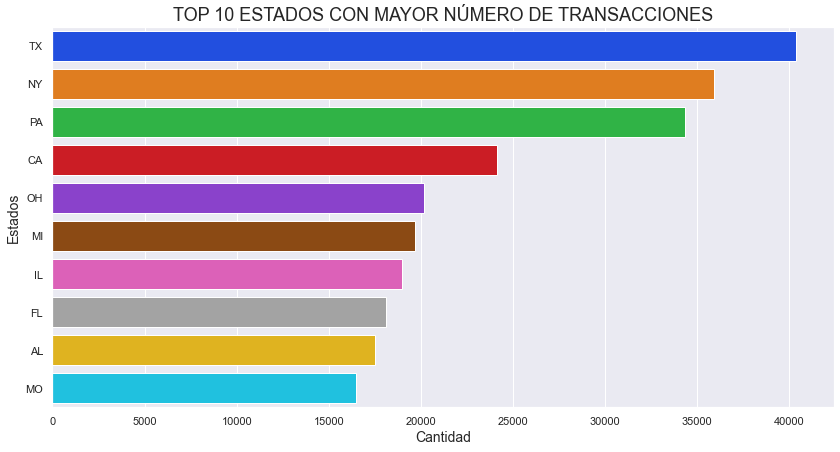

Estado
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
Name: Estado, dtype: int64


In [99]:
#Relación cantidad de transacciones y Estado
plt.figure(figsize=(14,7))
ax = sb.barplot(x = estados.values, y = estados.index, palette="bright")
ax.set_ylabel("Estados", fontsize=14)
ax.set_xlabel("Cantidad", fontsize=14)
ax.set_title("TOP 10 ESTADOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(estados)

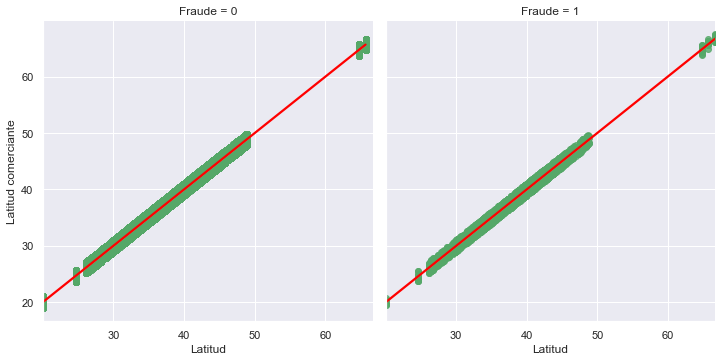

In [26]:
#ax = sb.lenplot
ax = sb.lmplot(y = 'Latitud comerciante', x = 'Latitud', data = data, col = 'Fraude', height = 5,
line_kws= {'color':'red'}, scatter_kws={'color':'g'})

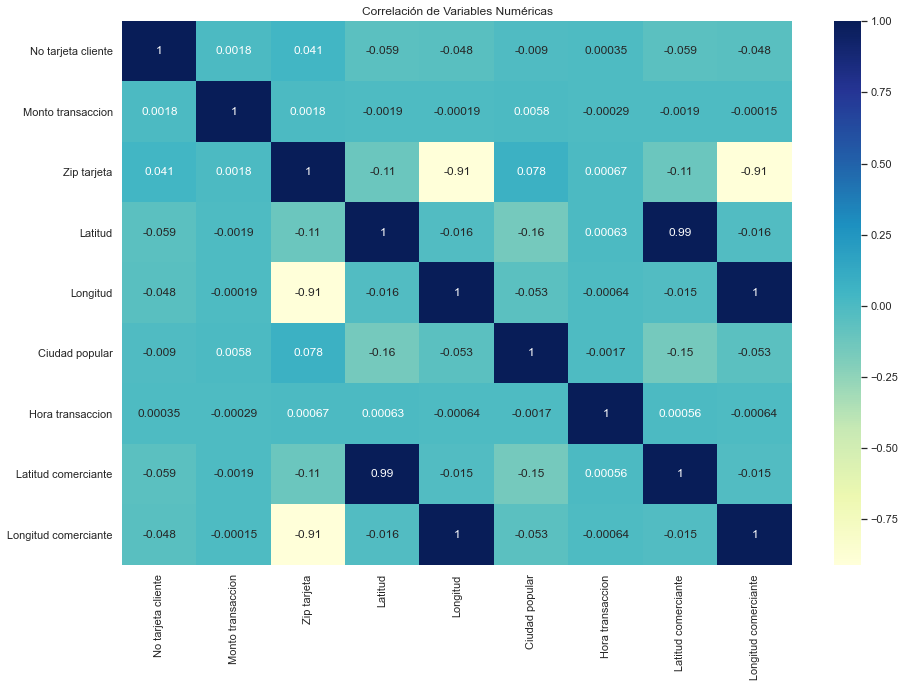

In [24]:
plt.figure(figsize=(15,10))
pc = data.corr(method ='pearson')
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 12}, cmap="YlGnBu")
plt.title('Correlación de Variables Numéricas')
plt.show()

## 4. Hipótesis

-Primera hipotesis

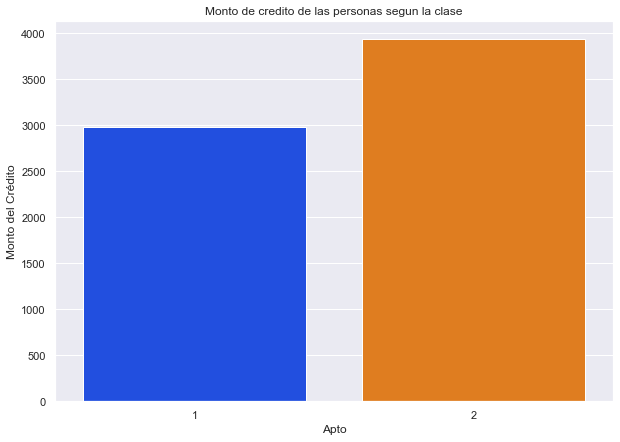

In [9]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Apt', y = 'Credit Amount', data = data, ci = None, palette="bright")
plt.title("Monto de credito de las personas segun la clase")
plt.ylabel("Monto del Crédito")
plt.xlabel("Apto")
plt.show()

- Hipotesis Alternativa: si existen diferencias significativas en el monto del credito de las personas que clasificarón o no a un prestamo
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5

In [24]:
def prueba(p):
    if (p < 0.05):
        return ("Si existen diferencias significativas")
    return("No se econtrarón diferencias significativas")

In [18]:
from scipy.stats import ttest_ind
bueno = data.loc[data['Apt'] == 1]
malo = data.loc[data['Apt'] == 2]
buenoMonto= bueno['Credit Amount']
maloMonto = malo['Credit Amount']
data.groupby('Apt')['Credit Amount'].mean()

Apt
1    2985.457143
2    3938.126667
Name: Credit Amount, dtype: float64

In [46]:
stat, p = ttest_ind(maloMonto, buenoMonto, equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=4.264, p=0.000025


In [71]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es aceptada por lo tanto si existen diferencias significativas

### Segunda Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto del credito de las personas segun su sexo
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5

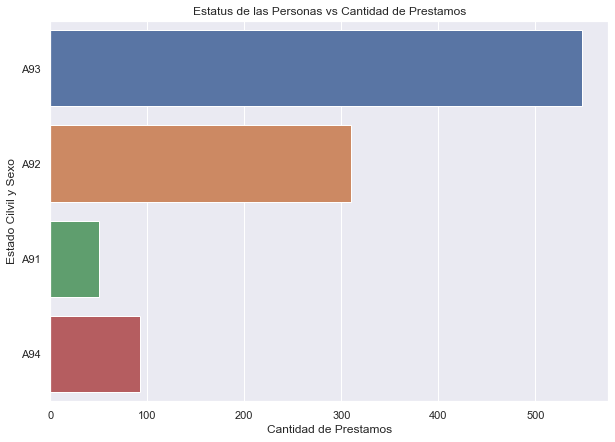

Status and Sex
A93    548
A92    310
A94     92
A91     50
Name: Status and Sex, dtype: int64


In [10]:
plt.figure(figsize=(10,7))
sb.countplot(y = data['Status and Sex'], data = data)
plt.ylabel("Estado Cilvil y Sexo")
plt.xlabel("Cantidad de Prestamos")
plt.title("Estatus de las Personas vs Cantidad de Prestamos")
plt.show()
print(data.groupby('Status and Sex')['Status and Sex'].count().sort_values(ascending = False))

In [67]:
hombre = (data['Status and Sex'] == 'hombre CV') | (data['Status and Sex'] == 'hombre DS')
mujer = (data['Status and Sex'] == 'mujer DSC') | (data['Status and Sex'] == 'mujer sol')
hombreData = data[hombre]
mujerData = data[mujer]

#data['Status and Sex'].unique()

In [68]:
hombreMonto= hombreData['Credit Amount']
mujerMonto = mujerData['Credit Amount']

In [69]:
stat, p = ttest_ind(hombreMonto, mujerMonto, equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=-3.368, p=0.000898


In [72]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es aceptada por lo tanto si existen diferencias significativas

### Tercera Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto del credito de las personas segun su sexo
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5

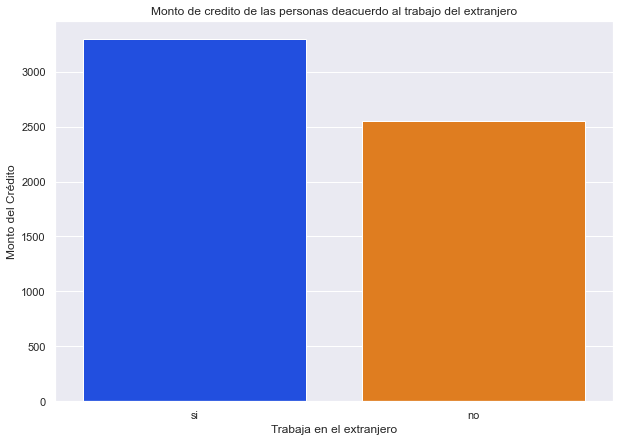

In [15]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Foreing Worker', y = 'Credit Amount', data = data, ci = None, palette="bright")
plt.title("Monto de credito de las personas deacuerdo al trabajo del extranjero")
plt.ylabel("Monto del Crédito")
plt.xlabel("Trabaja en el extranjero")
plt.show()

In [20]:
si = data.loc[data['Foreing Worker'] == 'si']
no = data.loc[data['Foreing Worker'] == 'no']
siMonto= si['Credit Amount']
noMonto = no['Credit Amount']

In [32]:
stat, p = ttest_ind(noMonto, siMonto, equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=-1.407, p=0.167417


In [31]:
prueba(p)

'No se econtrarón diferencias significativas'